# Ukázka použití modulu `Billiard`

Načtení modulu.

In [1]:
include("src/billiard.jl")
using .Billiard

Pomocná metoda pro vygenerování několika (`count`) trajektorií začínajících s polohou v obdélníku o souřadnicích `bounding_box = [xmin, xmax, ymin, ymax]`, s rychlostí náhodně rozloženou ve všech směrech a s `steps` odrazy na kulečníku `table`. Vrací prosté pole trajektorií.

In [2]:
function generate_paths(bounding_box::Vector{Float64}, table::Table; count::Integer=50, steps::Integer=1_000)
    xmin, xmax, ymin, ymax = bounding_box
    paths = []
    path = zeros(4, steps)
    for _ = 1:count
        start = [ xmin + rand() * (xmax - xmin), ymin + rand() * (ymax - ymin) ]
        angle = 2pi * rand()
        velocity = 10 * [cos(angle), sin(angle)]
        path[1:4, 1] = vcat(start, velocity)
        simulate!(table, path)
        push!(paths, copy(path))
    end

    return paths
end

generate_paths (generic function with 1 method)

## Čtvercový kulečník

Definice kulečníku.

In [3]:
table = Table([
        Segment([-100.0, -100.0], [ 100.0, -100.0]),
        Segment([ 100.0, -100.0], [ 100.0,  100.0]),
        Segment([ 100.0,  100.0], [-100.0,  100.0]),
        Segment([-100.0,  100.0], [-100.0, -100.0])
])

Billiard table with 4 obstacles.

Pole pro výpočet a nastavení počátečního stavu.

In [4]:
path = zeros(4, 10)
path[:, 1] = [100.0, 0., -10.0, 10.0];

Spuštění výpočtu.

In [5]:
simulate!(table, path)

Výsledek experimentu.

In [6]:
path

4×10 Matrix{Float64}:
 100.0    0.0  -100.0     0.0  100.0    0.0  -100.0     0.0  100.0    0.0
   0.0  100.0     0.0  -100.0    0.0  100.0     0.0  -100.0    0.0  100.0
 -10.0  -10.0    10.0    10.0  -10.0  -10.0    10.0    10.0  -10.0  -10.0
  10.0  -10.0   -10.0    10.0   10.0  -10.0   -10.0    10.0   10.0  -10.0

Grafická reprezentace.

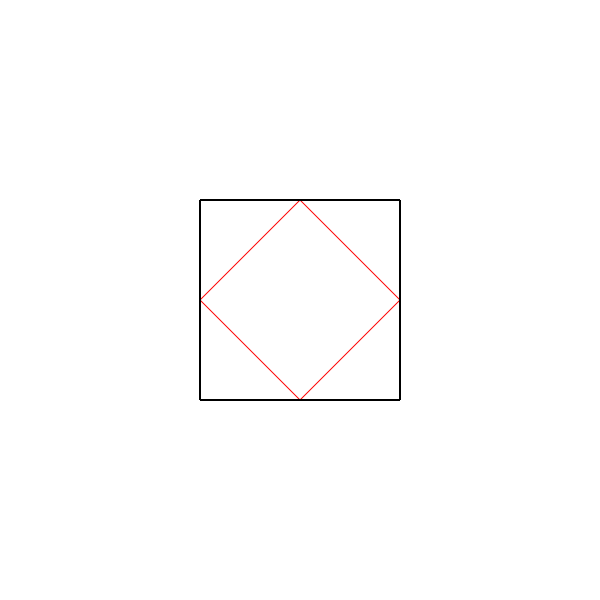

In [7]:
draw_path(table, path)

Jiné počáteční podmínky a více odrazů.

In [8]:
path = zeros(4, 100)
path[:, 1] = [1.0, 0., -9.0, 1.1];

Výpočet.

In [9]:
simulate!(table, path)

Vizualizace výsledku.

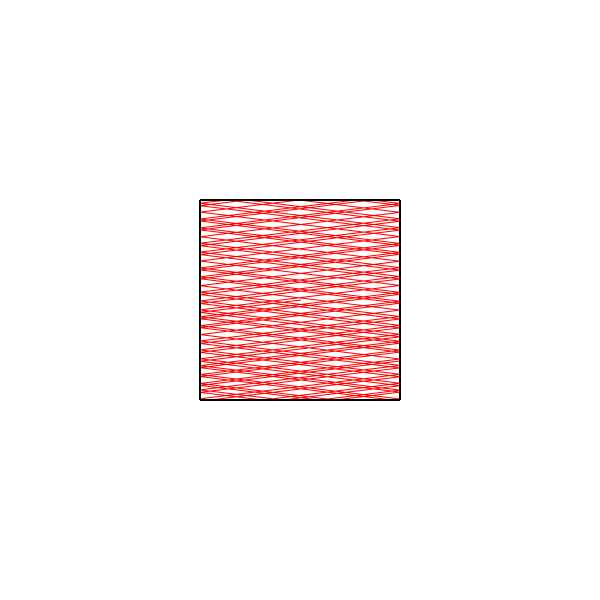

In [10]:
draw_path(table, path)

Pojďme se podívat na Poincarého řez podél svislé osy, nejprve vygenerujeme množství trajektorií.

In [11]:
paths = generate_paths([0., 1., 0., 1.], table, steps=10_000);

A poté Poincarého řez vykreslíme.

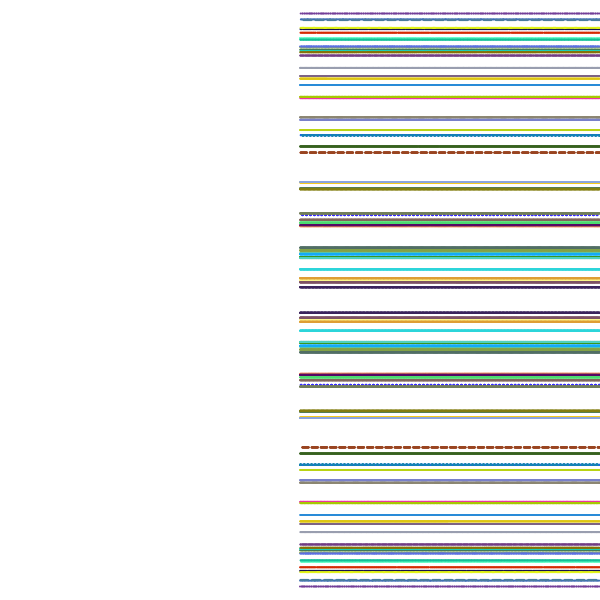

In [12]:
draw_poincare(paths, [0., -100.], [0., 100.])

Ve vodorovném směru máme polohu na řezu kulečníkem a ve svislém směru pak směr rychlosti.
Jednotlivé trajektorie jsou rozlišeny barvičkou.
Co pozorujeme, je pravidelné chování. Každá trajektorie prochází řezem pod několika málo úhly.
Toto není chaotický kulečník.

## Pětistranný kulečník

Definice kulečníku.

In [13]:
table = Table([
            Segment(100*[cos(2pi/5*j), sin(2pi/5*j)], 100*[cos(2pi/5*(j+1)), sin(2pi/5*(j+1))]) for j = 0:4
        ])

Billiard table with 5 obstacles.

Pokusná trajektorie.

In [14]:
path = zeros(4, 2_00)
path[:, 1] = [0., 0., 7., 2.]
path[:, 1:10]

4×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [15]:
simulate!(table, path)

In [16]:
path[:, 1:10]

4×10 Matrix{Float64}:
 0.0  82.81       7.89742   14.2591   …  -80.9017   -71.3126   88.1286
 0.0  23.66     -87.6311    89.6981      -49.6448   -61.8942  -16.3396
 7.0  -4.06523    0.261006   4.48755       4.48755    7.0      -0.261006
 2.0  -6.03936    7.27543   -5.73253      -5.73253    2.0       7.27543

Vykreslení výsledku.

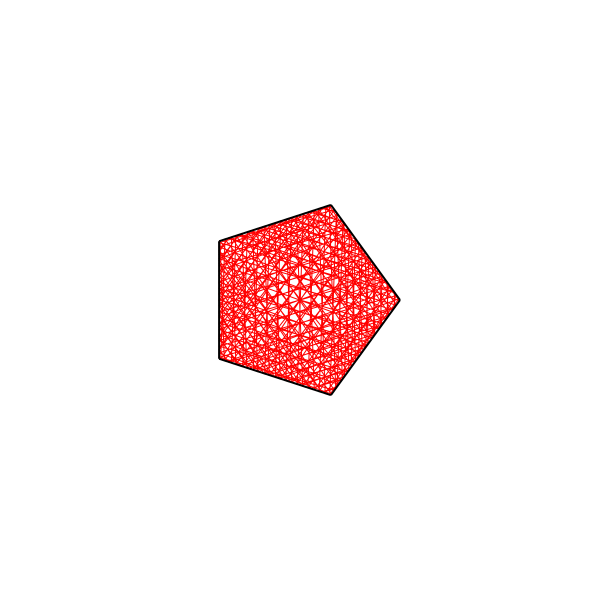

In [17]:
draw_path(table, path)

Poincarého řez opět svislou osou.

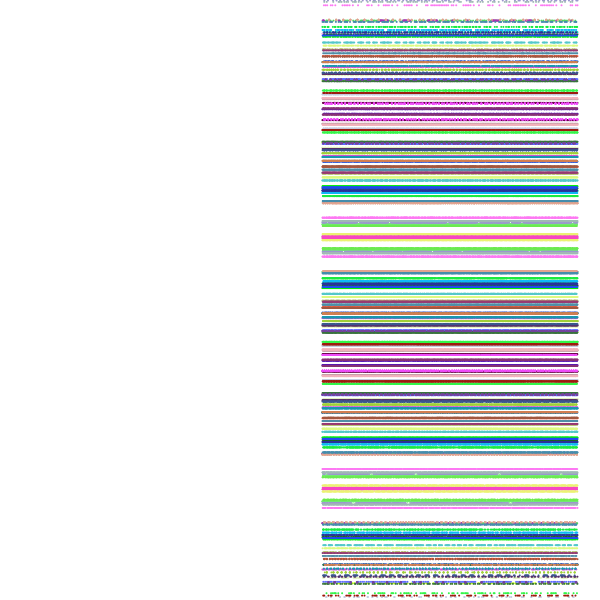

In [18]:
paths = generate_paths([-1., 1., -1., 1.], table, steps=10_000);
draw_poincare(paths, [0., -100.], [0., 100.])

Stále poměrně regulární chování.

## Kruhový kulečník

Definice kulečníku.

In [19]:
table = Table([
    Arc([0., 0], 100., -pi, pi),
])

Billiard table with 1 obstacle.

Jednoduchá pokusná trajektorie.

In [20]:
path = zeros(4, 1_00)
path[:, 1] = [20., 0., 7., 2.]
path

4×100 Matrix{Float64}:
 20.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  7.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  2.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

Výpočet.

In [21]:
simulate!(table, path)

In [22]:
path

4×100 Matrix{Float64}:
 20.0  97.5166   -99.3579    99.9994    …  -61.6505    52.6392   -42.9924
  0.0  22.1476   -11.3141     0.344011      78.7351   -85.0242    90.2865
  7.0  -7.17718    7.26769   -7.27045        4.1665    -3.48631    2.76402
  2.0  -1.21987    0.425004   0.374991      -5.96995    6.39106   -6.735

Zobrazení výsledku.

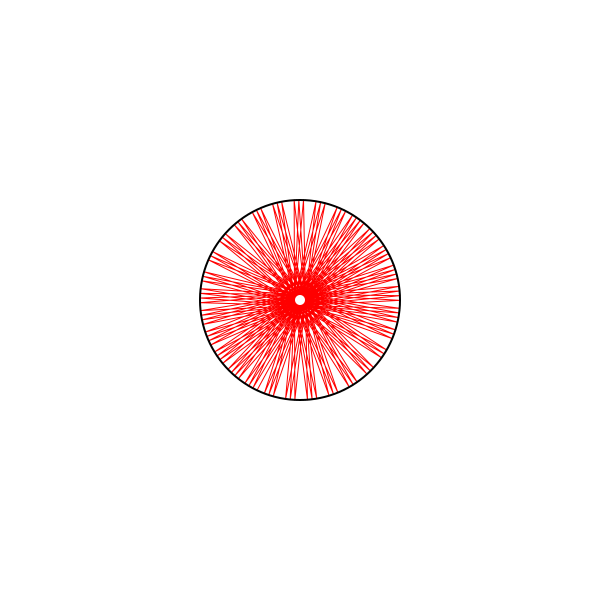

In [23]:
draw_path(table, path)

Prozkoumání chování pomocí Poincarého řezu opět podél svislé osy (zde irelevantní).

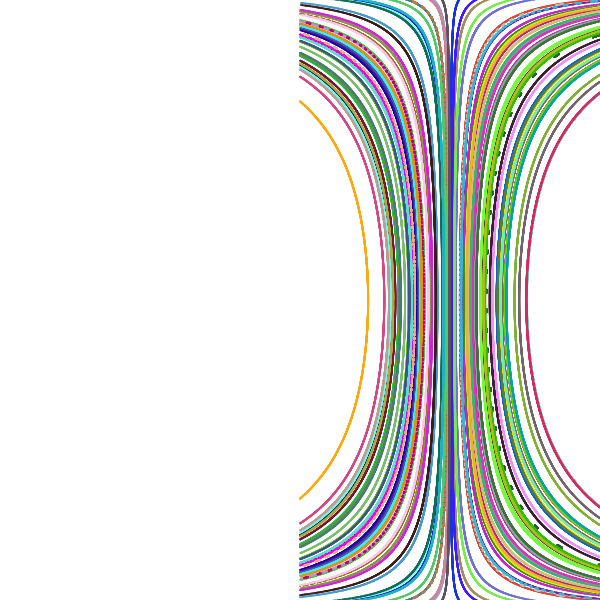

In [24]:
paths = generate_paths([-40., 40., -40., 40.], table, steps=10_000, count=100);
draw_poincare(paths, [0., -100.], [0., 100.])

Zde má řez kvalitativně velmi odlišný tvar od případu mnohoúhelníku, ale stále je v něm vidět silná struktura, průsečíky jednotlivých trajektorií s řezem vytvářejí křivky.

## Stadión

Definice kulečníku.

In [25]:
table = Table([
    Segment([-100., -100.], [100., -100.]),
    Arc([100., 0], 100., -pi/2, pi/2),
    Segment([100., 100.], [-100., 100.]),
    Arc([-100., 0], 100., pi/2, 3pi/2),
])

Billiard table with 4 obstacles.

Pokusná trajektorie.

In [26]:
path = zeros(4, 20)
path[:, 1] = [0., 0., 7., 2.]
path[:, 1:10]

4×10 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [27]:
simulate!(table, path)

In [28]:
path[:, 1:10]

4×10 Matrix{Float64}:
 0.0  184.906      46.5035   …    79.9431   -169.194     -60.6774
 0.0   52.8302   -100.0         -100.0        72.1953   -100.0
 7.0   -4.88679    -4.88679       -5.98885     3.88144     3.88144
 2.0   -5.39623     5.39623        4.13929    -6.15909     6.15909

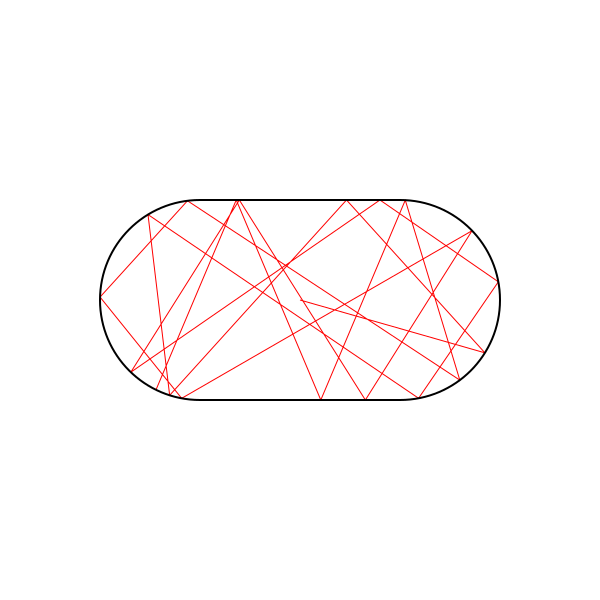

In [29]:
draw_path(table, path)

Jak je to s chováním z pohledu Poincarého řezu? Opět tneme kulečník podél svislé osy.

In [30]:
paths = generate_paths([-1., 1., -1., 1.], table, steps=10_000);

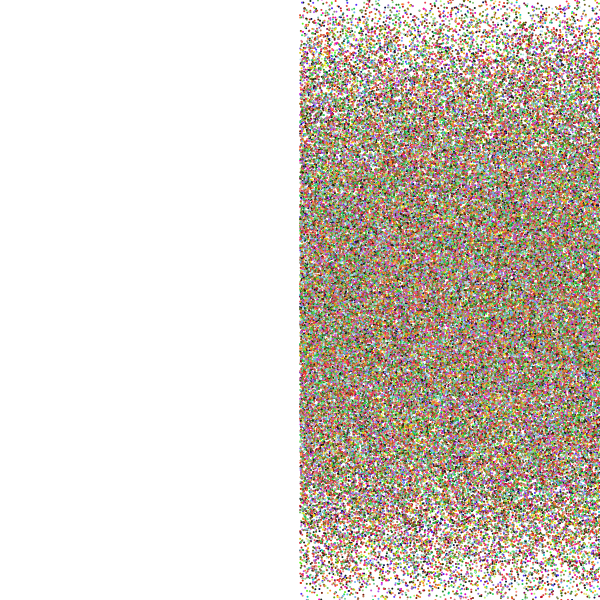

In [31]:
draw_poincare(paths, [0., -100.], [0., 100.])

Zde není vidět žádná struktura, toto je chaos.

## Mezikruží

Definice kulečníku.

In [32]:
table = Table([
    Arc([0., 0], 100., -pi, pi),
    Arc([0., 0], 50., -pi, pi)
])

Billiard table with 2 obstacles.

Pokusná trajektorie.

In [33]:
path = zeros(4, 200)
path[:, 1] = [75., 0., 6., 2.]
path[:, 1:10]

4×10 Matrix{Float64}:
 75.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [34]:
simulate!(table, path)

In [35]:
path[:, 1:10]

4×10 Matrix{Float64}:
 75.0  99.6615    47.1865   82.9924   …  -4.0072   -14.5296   -52.2354
  0.0   8.22051   16.5358   55.7877      99.9197    47.8423    85.2728
  6.0  -6.24662    4.26232  -5.93595     -1.25259   -4.48849    1.93031
  2.0   0.989846   4.67254  -2.18277     -6.19928    4.45572   -6.02278

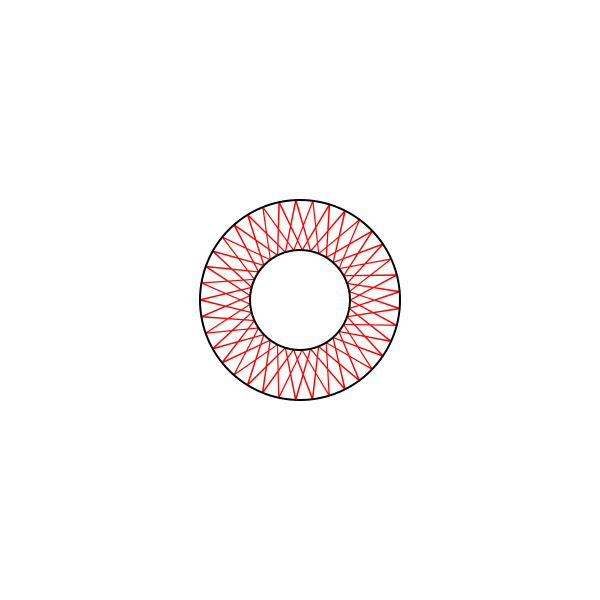

In [36]:
draw_path(table, path)

Poincarého řez proveďme v pravé části mezikruží, na kladné části osy $x$.

In [37]:
paths = generate_paths([-5., 5., 60., 90.], table, steps=10_000);

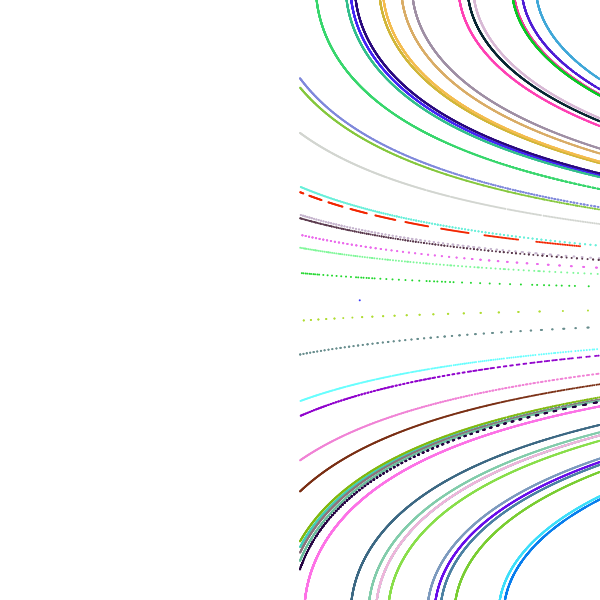

In [38]:
draw_poincare(paths, [50., 0.], [100., 0.])

## Váš kulečník...

Pokusíte se vytvořit vlastní zajímavý kulečník? Z nejlepší můžeme poté vyrobit poster pro další běhy BI-JUL.